In [25]:
import pandas as pd
import numpy as np
#hide earrings 
import warnings
warnings.filterwarnings('ignore')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\python\Quater2\sample_data.csv')

In [3]:
"""As mentioned before, prop_1, prop_2, prop_3, and prop_4 are the properties associated with the molecules and Activity 
can be thought of as antibiotic activity or anti-inflammatory activity. If the activity is 1 then the molecule is active or 
else it is not"""
df

,prop_1,prop_2,prop_3,prop_4,Activity
0,4.060000,71.010000,57.200000,5.820000,1
1,3.630000,65.620000,52.680000,5.440000,1
2,3.630000,68.900000,58.290000,6.060000,1
3,4.110000,75.590000,62.810000,6.440000,1
4,4.000000,70.860000,58.050000,6.060000,1
...,...,...,...,...,...
535,5.289450,49.043544,40.465770,4.111193,1
536,5.703150,50.957793,44.165036,4.620044,1
537,5.895225,53.324354,44.116574,4.418119,1
538,5.880450,52.831657,44.165036,4.620044,1


In [5]:
df['Activity'].unique()

array([1, 0], dtype=int64)

In [6]:
df['Activity'].value_counts()

1    369
0    171
Name: Activity, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prop_1    540 non-null    float64
 1   prop_2    540 non-null    float64
 2   prop_3    540 non-null    float64
 3   prop_4    540 non-null    float64
 4   Activity  540 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 21.2 KB


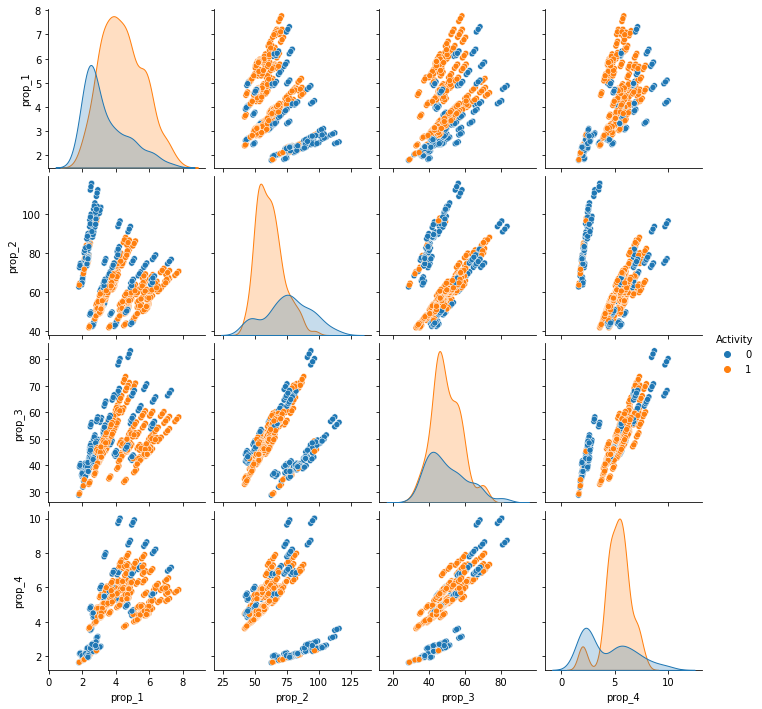

In [11]:
def get_pair_plot(df_id,hue_id):
    sns.pairplot(data= df_id,hue=hue_id)
    """The pairs plot builds on two basic figures, the histogram and the scatter plot.
    The histogram on the diagonal allows us to see the distribution of a single variable.
    while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
    For example, the left-most plot in the second row shows the scatter plot of Age versus User ID."""
    plt.show()
get_pair_plot(df,'Activity')

### Splitting Dataset into Train and Test Feature Matrix and Dependent Vector

In [12]:
#Separate Feature Matrix and Target vector
def get_seprate_features(df_id,col_id):
    #col_id is special col or target col b/c this the whole model is going to be created 
    global X, y
    X = df_id.drop(col_id,axis = 1) 
    y = df_id[col_id]
get_seprate_features(df,['Activity'])

In [13]:
X.head()

,prop_1,prop_2,prop_3,prop_4
0,4.06,71.01,57.20,5.82
1,3.63,65.62,52.68,5.44
2,3.63,68.90,58.29,6.06
3,4.11,75.59,62.81,6.44
4,4.00,70.86,58.05,6.06


In [14]:
y.head()

,Activity
0,1
1,1
2,1
3,1
4,1


In [16]:
from sklearn.model_selection import train_test_split
def get_train_test_split(array1, array2, test_size, random_state):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(array1, array2, test_size=test_size,random_state=random_state)
get_train_test_split(X,y,0.3,0)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [20]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
378/378 [==============================] - 2s 2ms/step - loss: 6.2739 - accuracy: 0.6111
Epoch 2/50
378/378 [==============================] - 1s 2ms/step - loss: 0.5695 - accuracy: 0.7672
Epoch 3/50
378/378 [==============================] - 1s 2ms/step - loss: 0.5671 - accuracy: 0.7646
Epoch 4/50
378/378 [==============================] - 1s 2ms/step - loss: 0.5329 - accuracy: 0.7963
Epoch 5/50
378/378 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7963
Epoch 6/50
378/378 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.7989
Epoch 7/50
378/378 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7751
Epoch 8/50
378/378 [==============================] - 1s 2ms/step - loss: 0.5044 - accuracy: 0.8122
Epoch 9/50
378/378 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.8069
Epoch 10/50
378/378 [==============================] - 1s 2ms/step - loss: 0.4925 - accuracy: 0.8069

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc*100)
print('Test loss:', test_loss*100)

6/6 [==============================] - 1s 5ms/step - loss: 0.3803 - accuracy: 0.8086
Test accuracy: 80.86419701576233
Test loss: 38.02781403064728
